# PREDICTION OF STOCK PRICES USING SUPERVISED MACHINE LEARNING 
## AUTHOR : MAHESRAM P S 

## INTRODUCTION 

In this Model we will be Perdicting the stock closing price unsing supervised machine learning with multiple linear regression with nifty50 stock market dataset from 2000 to 2021. To build the model I have used TCS share from nifty dataset. An algorithm can learn from labelled data using supervised machine learning to make predictions or take actions depending on input features. In supervised learning, input features and related target labels or output values are given to a training dataset. The objective is to train a mapping function that connects the input attributes to the target labels such that it may be applied to forecast new, unforeseen data.

Supervised machine learning is commonly used for tasks such as classification, regression, and time series forecasting. It finds applications in various domains, including finance, healthcare, marketing, image recognition, natural language processing, and many others. By fitting a linear equation to the observed data, multiple linear regression is a statistical approach used to model the relationship between several independent variables (features) and a dependent variable (goal).

## Objectives 


1. To predict the closing price based on the Opening price, High pirce,Low price ,Last prince and Previouse Closing price.
2.Evaluate the Model. 
3. Analyzed the model with different unseen values.


#### Importing Necessary Libraries and Importing the file.

In [21]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv('nifty50-stock-market-data/TCS.csv', na_values=(""))

## Exploratory Data Analysis

In [23]:
#Dimention of dataset
df.shape

(4139, 15)

In [24]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


### Taking out the Needed Datas

In [25]:
dfr = df[['Close','Open','High','Low','Last','Prev Close']]

In [26]:
dfr.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

**From this Discriptive statistics we can find that when the Opening price is 1625 , High price is 1655 ,low price is 1610 , last price is 1630 and privious close is 1633 the closing price will at 1694 Rs.**

In [ ]:
cor_matrix = dfr.corr()
cor_matrix

,Close,Open,High,Low,Last,Prev Close
Close,1.000000,0.999206,0.999645,0.999651,0.999981,0.998135
Open,0.999206,1.000000,0.999578,0.999563,0.999189,0.998782
High,0.999645,0.999578,1.000000,0.999459,0.999623,0.998465
Low,0.999651,0.999563,0.999459,1.000000,0.999628,0.998480
Last,0.999981,0.999189,0.999623,0.999628,1.000000,0.998124
Prev Close,0.998135,0.998782,0.998465,0.998480,0.998124,1.000000


Text(0.5, 1.0, 'Correlation of Variables ')

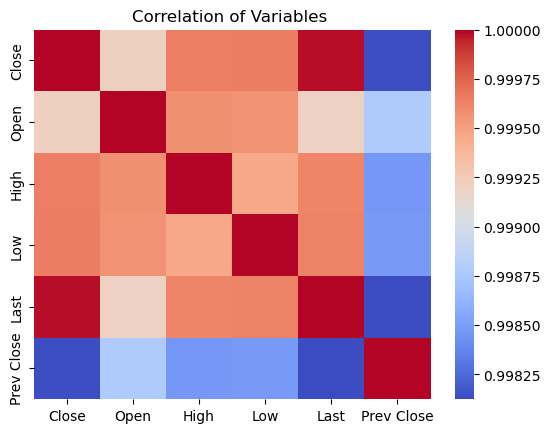

In [ ]:
sns.heatmap(cor_matrix , cmap = 'coolwarm' , annot = False)
plt.title('Correlation of Variables ')

**From this correlation analysis we can find that the every independent variable is having a high correlatiion with the dependent variable.**

## Checking the relationship of each variable with Dependent variable [](http://)

Text(0.5, 1.0, 'Relationship of Closing and Opening price')

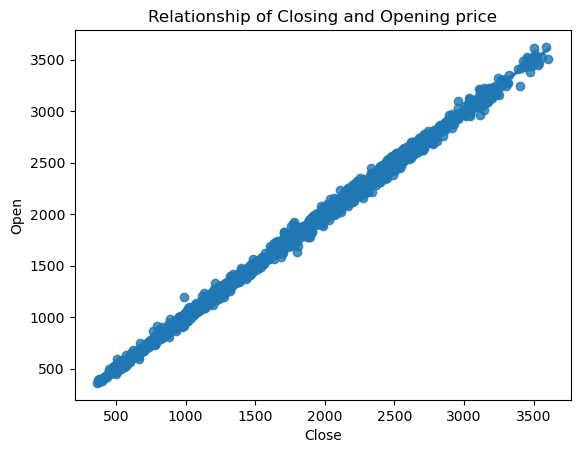

In [ ]:
sns.regplot(x = df[['Close']], y = df[['Open']], data= df)
plt.title("Relationship of Closing and Opening price")

Text(0.5, 1.0, 'Relationship of Closing and High price')

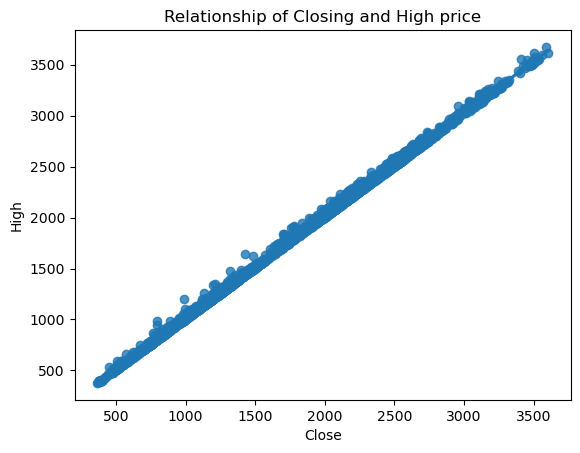

In [ ]:
sns.regplot(x = df[['Close']], y = df[['High']], data= df)
plt.title("Relationship of Closing and High price")

Text(0.5, 1.0, 'Relationship of Closing and Low price')

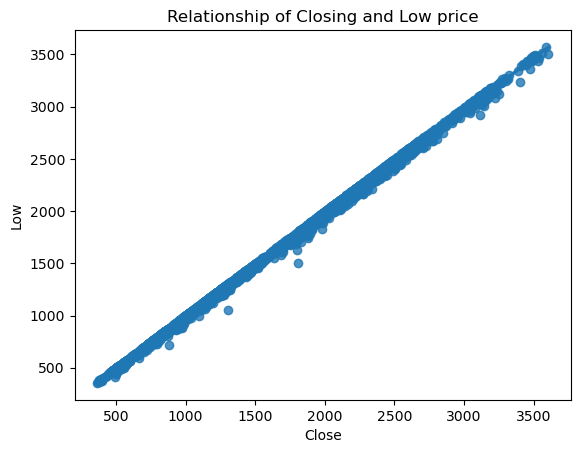

In [ ]:
sns.regplot(x = df[['Close']], y = df[['Low']], data= df)
plt.title("Relationship of Closing and Low price")

Text(0.5, 1.0, 'Relationship of Closing and Last price')

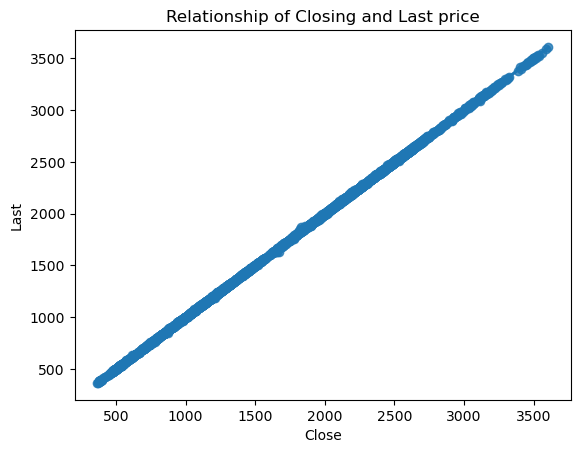

In [ ]:
sns.regplot(x = df[['Close']], y = df[['Last']], data= df)
plt.title("Relationship of Closing and Last price")

Text(0.5, 1.0, 'Relationship of Closing and Previouse close price')

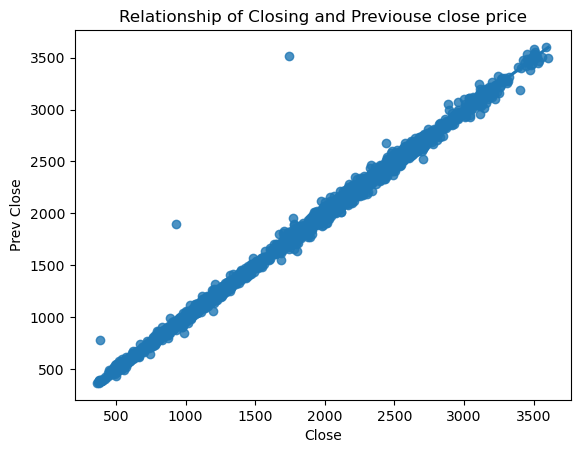

In [ ]:
sns.regplot(x = df[['Close']], y = df[['Prev Close']], data= df)
plt.title("Relationship of Closing and Previouse close price")

**Each independent variable has a positve realtionship with the dependent variable, and Previous closing price have some outliers.**

## Alloting the Dependent and Independent Variable 

In [ ]:
y = df[['Close']]
x = df[['Open','High','Low','Last','Prev Close']]

### Spiliting the Dependent and Independet Variables in Training and Testings values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state  = 0)

In [ ]:
#dimentions of training models
x_train.shape

(2897, 5)

In [ ]:
#dimentions of testing models
x_test.shape

(1242, 5)

## Training the model 

In [ ]:
lm = LinearRegression()
lm.fit(x_train,y_train)

print('Intercept: ' ,  lm.intercept_)
print('coefficient : ' ,  lm.coef_)

Intercept:  [0.4633596]
coefficient :  [[-0.06695249  0.10075534  0.09384975  0.8748669  -0.0028351 ]]


**From this Regression anaalysis  we can see that two variables are negatively related while training the model that are Previous close price and open price.**

### MODEL

**Close = 0.4633596 - (0.06695249 * Open) + (0.10075534 * High) + (0.09384975 * Low) + (0.8748669 * Last) - (0.0028351 * Perv Close)**

In [ ]:
#Predicting the model 
yhat = lm.predict(x_test)

print(yhat)

[[ 847.70837503]
 [2676.71767979]
 [1164.74143655]
 ...
 [2503.43377164]
 [1743.64362   ]
 [ 745.89202508]]


In [ ]:
print({'Actual': y_test, 'Predicted': yhat})


{'Actual':         Close
958    844.40
2613  2675.25
45    1165.95
3145  2310.35
3994  2488.40
...       ...
1957  1247.85
1513   927.60
3112  2499.80
3418  1741.05
1358   746.15

[1242 rows x 1 columns], 'Predicted': array([[ 847.70837503],
       [2676.71767979],
       [1164.74143655],
       ...,
       [2503.43377164],
       [1743.64362   ],
       [ 745.89202508]])}


<Axes: ylabel='Density'>

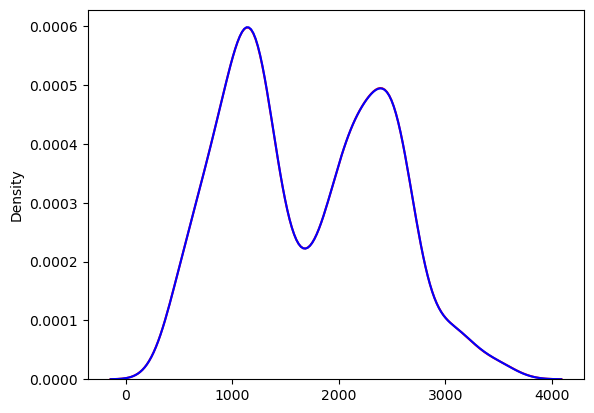

In [ ]:
axl = sns.distplot(y_test, hist = False , color  = 'r')

sns.distplot(yhat, hist = False , color = 'b', ax = axl)

**In comparing the predicted values with actual values, the values are same. let's justify by evaluating the model.**

## Model Evaluation 

In [ ]:
mean_squared_error(y_test, yhat )

16.032826179874565

In [ ]:
rsqr = lm.score(x,y)

print('R - Squared :' , rsqr)

R - Squared : 0.999967357434323


From the above two model evaluation matrix we can find that the goodness of fit is 0.9999 which explians that the independent variable explians the 99.99% of the dependent variable and The average error between the predictions and actuals in this dataset is 16.03, which is likely a good value considering the average closing price is 1694.

Text(0.5, 0, 'yhat')

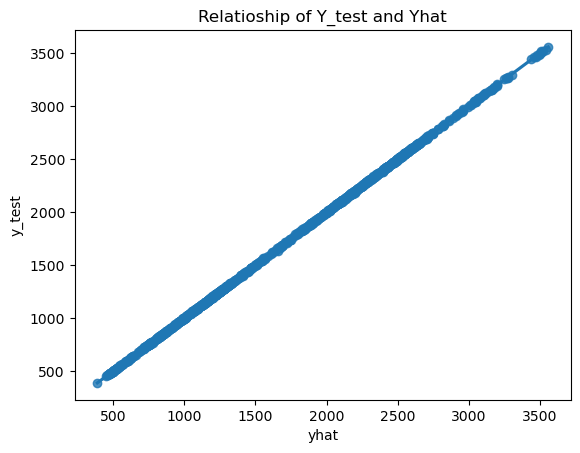

In [ ]:
sns.regplot( x = y_test, y = yhat , data = df)
plt.title('Relatioship of Y_test and Yhat')
plt.ylabel('y_test')
plt.xlabel('yhat')

## ANALYSING  WITH THE MODEL 

We will take some relevant unseen values of independent variable to prideict the dependent variable closing price.

1. Open : 3326
2. High : 3335 
3. Low  : 3302 
4. Last : 3308 
5. Prev Close : 3324

In [ ]:
values = [[3326,3335,3302,3308,3324]]

closep = lm.predict(values)

print('Closing Price :', closep)

Closing Price : [[3308.32614286]]


**If  the Open pirce is 3326, High price is 3335 , Low price is 3302 , Last price is 3308 and Prev Close  price is 3324 the closing price will be 3308.**

## CONCLUSION

According to the descriptive statistics, the closing price will be 1694 Rs. while the opening price is 1625, the high price is 1655, the low price is 1610, the last price was 1630, and the previous closure was 1633. Each independent variable and the dependent variable have high correlations according to the correlation analysis, which suggests a favourable association. There are some anomalies in the prior closing price, though. The model's open price and preceding closing price have a negative association, according to the regression analysis.

**Close = 0.4633596 - (0.06695249 * Open) + (0.10075534 * High) + (0.09384975 * Low) + (0.8748669 * Last) - (0.0028351 * Prev Close) is the formula for the model**.

The expected values and actual values are very similar. The dependent variable is explained by the independent variables in 99.99% of the cases when the goodness of fit is 0.9999. Given the average closing price of 1694, the average difference between projections and actuals is 16.03, which is fair. Therefore this Machine learning Model is Valid.